In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from Hamiltonian import Hamiltonian
from op_collapse import op_collapse
%matplotlib inline

# Minggu ke-2 Bulan April

Tujuan:
* Melihat pengaruh laju disipasi medan ($\kappa$)

In [2]:
wa = 1.0*2*np.pi # frekuensi eksitasi atom
wc = wa # List dari frekuensi medan
N = 15 
use_rwa = False
gamma = 0.0                          # Laju disipasi atom
kappa_list = [0.0, 0.05, 0.1]        # list Laju disipasi medan
g = 0.1*np.pi                     # Kuat interaksi
tlist = np.linspace(0,200,501)        # List Waktu

#operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

# Inisiasi Keadaan awal
psi_0 = tensor(basis(N,0), basis(2,1)) # keadaan eksitasi
#psi_0 = tensor(basis(N,0), basis(2,0)) # keadaan eksitasi
P_a = []

## Melihat Pengaruhnya Terhadap Probabilitas Okupasi

In [3]:
# Kappa=0.0
P_list = []

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
C_opr = op_collapse(gamma=gamma, kappa=kappa_list[0], a=a, sm=sm, n_th=0.0)
me_result = mesolve(H, psi_0, tlist, C_opr, [sm.dag()*sm])
P_list = me_result.expect[0]

In [4]:
# Kappa=0.05
P_list_1 = []

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
C_opr = op_collapse(gamma=gamma, kappa=kappa_list[1], a=a, sm=sm, n_th=0)
me_result = mesolve(H, psi_0, tlist, C_opr, [sm.dag()*sm])

P_list_1 = me_result.expect[0]


In [5]:
# kappa=0.1
P_list_2 = []

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
C_opr = op_collapse(gamma=gamma, kappa=kappa_list[2], a=a, sm=sm, n_th=0)
me_result = mesolve(H, psi_0, tlist, C_opr, [sm.dag()*sm])
    
P_list_2 = me_result.expect[0]

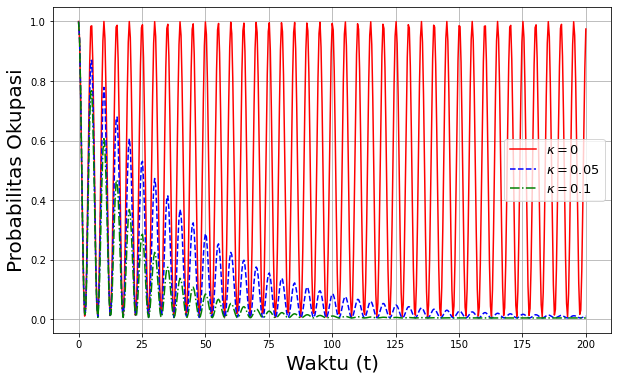

In [43]:
# plot grafik
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P_list,'r-', label=r"$\kappa=0$")
axes.plot(tlist, P_list_1,'b--', label=r"$\kappa=0.05$")
axes.plot(tlist, P_list_2,'-.g', label=r"$\kappa=0.1$")
#axes.plot(tlist,
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Probabilitas Okupasi', fontsize=20)
axes.grid()
#axes.set(xlim=(0, 30), ylim=(0, 1.02))
#plt.savefig('Plot_prob okupasi_gamma.pdf')  

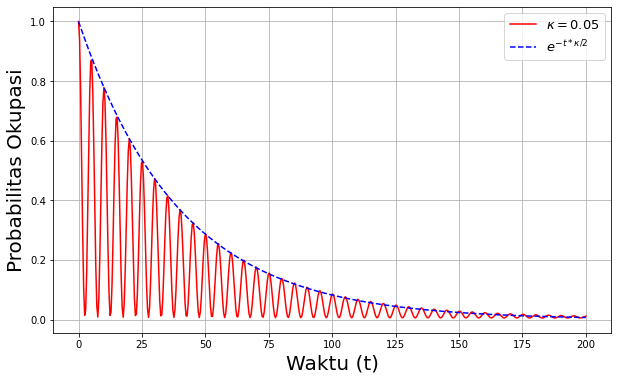

In [44]:
dm = np.exp(-tlist*(kappa_list[1]/2))

fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P_list_1,'r-', label=r"$\kappa=0.05$")
axes.plot(tlist, dm, 'b--', label=r"$e^{-t*\kappa/2}$")

axes.legend(loc=0,  fontsize=13)
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Probabilitas Okupasi', fontsize=20)
axes.grid()

## Pengaruh terhadap fungsi wigner

In [40]:
t_idx = np.where([tlist == t for t in [0.0, 5.0, 15.0, 25.0, 30.0, 40.0, 50.0]])[1]
t_idx

array([  0,  50, 150, 250, 300, 400, 500])

In [41]:
tlist[t_idx[4]]

30.0

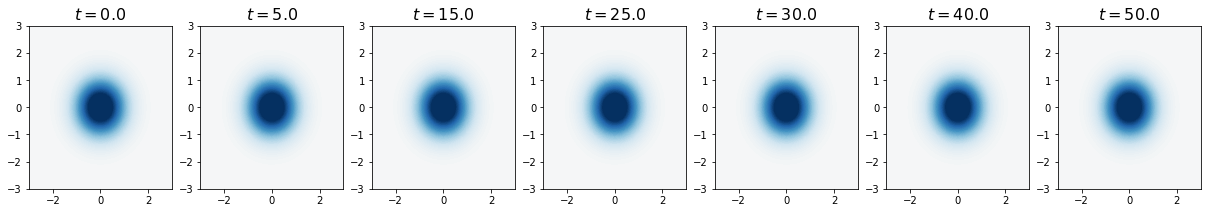

In [42]:
# kappa=0.0
xvec = np.linspace(-3,3,200)
fig, axes = plt.subplots(1,len(t_idx), sharex=True, figsize=(3*len(t_idx),3))

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
C_opr = op_collapse(gamma=gamma, kappa=kappa_list[0], a=a, sm=sm, n_th=0.0)
me_result = mesolve(H, psi_0, tlist, C_opr, [])
psi_list = me_result.states
i = 0
entropi_list = []
for idx, rho in enumerate(psi_list):
    rhoo = ptrace(rho, 1)
    entropi_list.append(entropy_vn(rhoo, 2))
    if idx == t_idx[i]:
        rho_cavity = ptrace(rho, 0)
        W = wigner(rho_cavity, xvec, xvec)
        axes[i].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
        axes[i].set_title(r"$t = %.1f$" % tlist[idx], fontsize=16)
        #plt.savefig('Plot_wigner {}_kappa.pdf'.format(j))
        #axes[i].bar(np.arange(0, N), np.real(rho_cavity.diag()), color="blue", alpha=0.6)
        #axes[i].set_ylim(0, 1)
        #axes[i].set_xlim(0, N)
        #axes[i].set_title(r"$t = %.1f$" % tlist[idx], fontsize=16)
        i += 1
#plt.savefig('Plot_fock state 0_kappa.pdf')

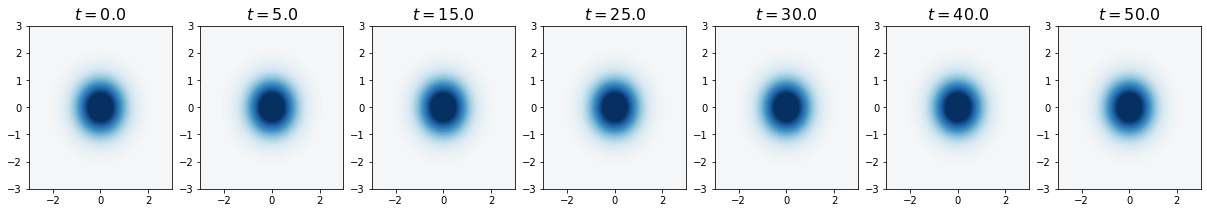

In [43]:
# kappa=0.05
xvec = np.linspace(-3,3,200)
fig, axes = plt.subplots(1,len(t_idx), sharex=True, figsize=(3*len(t_idx),3))

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
C_opr = op_collapse(gamma=gamma, kappa=kappa_list[1], a=a, sm=sm, n_th=0.0)
me_result1 = mesolve(H, psi_0, tlist, C_opr, [])
psi_list1 = me_result1.states
entropi_list1 = []
i = 0
for idx, rho in enumerate(psi_list1):
    rhoo1 = ptrace(rho, 1)
    entropi_list1.append(entropy_vn(rhoo1, 2))
    if idx == t_idx[i]:
        rho_cavity1 = ptrace(rho, 0)
        W1 = wigner(rho_cavity1, xvec, xvec)
        axes[i].contourf(xvec, xvec, W1, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
        axes[i].set_title(r"$t = %.1f$" % tlist[idx], fontsize=16)
        #plt.savefig('Plot_wigner {}_kappa.pdf'.format(j))
        #axes[i].bar(np.arange(0, N), np.real(rho_cavity1.diag()), color="blue", alpha=0.6)
        #axes[i].set_ylim(0, 1)
        #axes[i].set_xlim(0, N)
        #axes[i].set_title(r"$t = %.1f$" % tlist[idx], fontsize=16)
        i += 1
#plt.savefig('Plot_fock state 1_kappa.pdf')

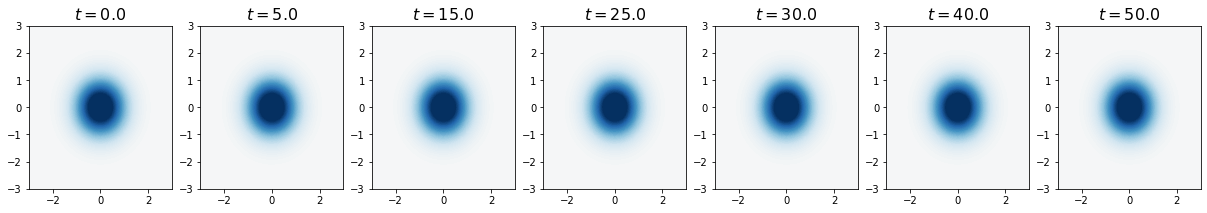

In [44]:
# kappa=0.1
xvec = np.linspace(-3,3,200)
fig, axes = plt.subplots(1,len(t_idx), sharex=True, figsize=(3*len(t_idx),3))

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
C_opr = op_collapse(gamma=gamma, kappa=0.1, a=a, sm=sm, n_th=0.0)
me_result2 = mesolve(H, psi_0, tlist, C_opr, [])
psi_list2 = me_result2.states
entropi_list2 = []
i = 0
for idx, rho in enumerate(psi_list2):
    rho_cavity2 = ptrace(rho, 0)
    rhoo2 = ptrace(rho, 1)
    entropi_list2.append(entropy_vn(rhoo2, 2))
    if idx == t_idx[i]:
        W2 = wigner(rho_cavity2, xvec, xvec)
        axes[i].contourf(xvec, xvec, W2, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
        axes[i].set_title(r"$t = %.1f$" % tlist[idx], fontsize=16)
        #plt.savefig('Plot_wigner {}_kappa.pdf'.format(j))
        #axes[i].bar(np.arange(0, N), np.real(rho_cavity2.diag()), color="blue", alpha=0.6)
        #axes[i].set_ylim(0, 1)
        #axes[i].set_xlim(0, N)
        #axes[i].set_title(r"$t = %.1f$" % tlist[idx], fontsize=16)
        i += 1
#plt.savefig('Plot_fock state 2_kappa.pdf')

## Pengaruh terhadap Entropi

Text(0, 0.5, 'Entropi')

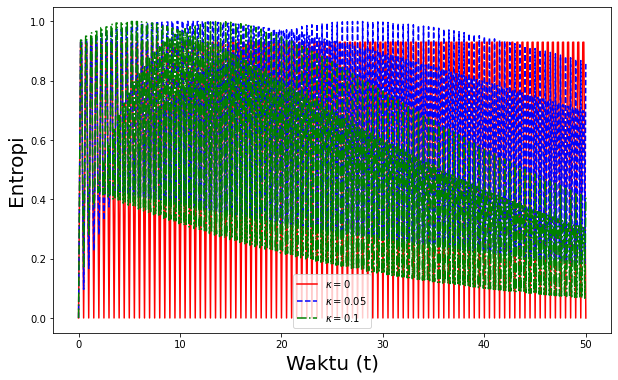

In [45]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, entropi_list, '-r', label=r"$\kappa=0$")
axes.plot(tlist, entropi_list1, '--b', label=r"$\kappa=0.05$")
axes.plot(tlist, entropi_list2, '-.g', label=r"$\kappa=0.1$")
axes.legend()
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Entropi', fontsize=20)

In [2]:
input("massukan nilai:")

massukan nilai:10


'10'

In [4]:
omega = input("massukan nilai: ")
omega = int(omega)
print(type(omega), "omega: ", omega)

massukan nilai: 10
<class 'int'> omega:  10
